<center>
    
    Discrete Dynamical Systems
    
    Author: Daniel Coble
    
    Status: Finished
</center>

Discrete dynamical systems are described by evolution $x_n = f(x_{n-1})$. Fixed points of dynamical systems arise when $x_n=f(x_n)$, and are useful for analysis. [Bifurcation theory](https://en.wikipedia.org/wiki/Bifurcation_theory), studies how fixed points change with additional parameters, i.e. $f(x, \lambda)$. The classic example of this is the [logistic map](https://en.wikipedia.org/wiki/Logistic_map), described by the simple equation $f(x, \lambda)=\lambda x (1-x)$. In this Notebook, I make an animation which shows how points in the map gravitate to the fixed points, eventually producing the bifurcation digram. The code is also easy to change for any function.

In [70]:
# works both on scalars and properly formatted numpy arrays
logistic = lambda x, l: l*x*(1-x)

In [71]:
# initialize arrays
import numpy as np

x_bounds = (0, 1)
lambda_bounds = (0, 4)
x_num = 500
lambda_resolution = 400
iterates = 256

lambda_points = np.linspace(lambda_bounds[0], lambda_bounds[1], num=lambda_resolution, endpoint=True)
x_start = np.linspace(x_bounds[0], x_bounds[1], num=x_num, endpoint=True)
x_, l_ = np.meshgrid(x_start, lambda_points)

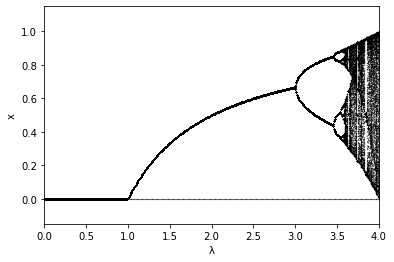

In [72]:
# animate
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["animation.html"] = "jshtml" # necessary only for jupyter notebooks

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_xlim(lambda_bounds)
ax.set_ylim((x_bounds[0]-.15, x_bounds[1]+.15))
ax.set_xlabel(u"\u03BB")
ax.set_ylabel("x")

l, = ax.plot([],[], marker = '.', markersize=.25, linewidth=0, c='k')

def animate(i):
    global x_
    l.set_data(l_.reshape(-1), x_.reshape(-1))
    x_ = logistic(x_, l_)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=iterates)
ani